## Covid 19 Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

^C


In [5]:
path = 'coviddata.csv'
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3411 entries, 0 to 3410
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            3006 non-null   float64
 1   Admin2          3009 non-null   object 
 2   Province_State  3233 non-null   object 
 3   Country_Region  3411 non-null   object 
 4   Last_Update     3411 non-null   object 
 5   Lat             3342 non-null   float64
 6   Long_           3342 non-null   float64
 7   Confirmed       3411 non-null   int64  
 8   Deaths          3411 non-null   int64  
 9   Recovered       3411 non-null   int64  
 10  Active          3411 non-null   int64  
 11  Combined_Key    3411 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 319.9+ KB


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-26 02:32:35,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-26 02:32:35,30.295065,-92.414197,299,18,0,281,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-26 02:32:35,37.767072,-75.632346,731,11,0,720,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-26 02:32:35,43.452658,-116.241552,796,23,0,773,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-26 02:32:35,41.330756,-94.471059,8,0,0,8,"Adair, Iowa, US"


  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=7b3648db17d309f08318af2b5182c8aa462d09ca563a9292de78d37165d2e8dc
  Stored in directory: c:\users\bashi\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [6]:
df.drop(['FIPS', 'Admin2','Last_Update','Province_State', 'Combined_Key'], axis=1, inplace=True)
df.rename(columns={'Country_Region': "Country"}, inplace=True)
df.head()

,Country,Lat,Long_,Confirmed,Deaths,Recovered,Active
0,US,34.223334,-82.461707,35,0,0,35
1,US,30.295065,-92.414197,299,18,0,281
2,US,37.767072,-75.632346,731,11,0,720
3,US,43.452658,-116.241552,796,23,0,773
4,US,41.330756,-94.471059,8,0,0,8


In [7]:
world = df.groupby("Country")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()
world.head()

<ipython-input-7-727609b8ab0a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  world = df.groupby("Country")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()


,Country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,11176,9857,1097,220
1,Albania,1004,177,795,32
2,Algeria,8503,3147,4747,609
3,Andorra,763,49,663,51
4,Angola,70,48,18,4


### Find top 20 countries with maximum number of confirmed cases

In [8]:
top_20 = world.sort_values(by=['Confirmed'], ascending=False).head(20)

### Generate a Barplot

C:\Users\bashi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


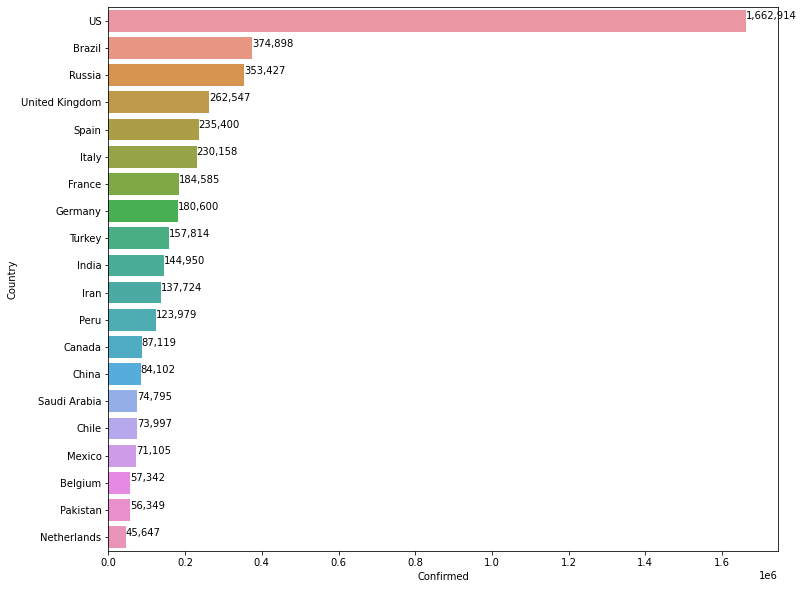

In [9]:
plt.figure(figsize=(12,10))
plot = sns.barplot(top_20['Confirmed'], top_20['Country'])
for i,(value,name) in enumerate(zip(top_20['Confirmed'],top_20['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()